In [1]:
from Bio import SeqIO
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import gseapy as gp
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
go_file = "enrichr/GO_Biological_Process_2023_table.txt"
rna_seq_file = "filtered_rnaseq_data_testis.tsv"

In [5]:
go_data = pd.read_csv(go_file, sep="\t")
rna_seq_data = pd.read_csv(rna_seq_file, sep="\t")

# 1. filter of genes associated with detection of chemical stimulus or detection of smell
list = ["detection of chemical stimulus", "detection of smell", "olfactory"]
filtered_go_genes = go_data[go_data['Term'].str.contains('|'.join(list), case=False, na=False)]

#Joining of the lists obtained before
gene_list = set(";".join(filtered_go_genes['Genes']).split(";"))

# 2. filter of RNA-seq based on our genes of interest
filtered_rna_seq = rna_seq_data[rna_seq_data['Gene'].isin(gene_list)]

# 3. Saving our results
filtered_rna_seq.to_csv("filtered_expression_testis.tsv", sep="\t", index=False)

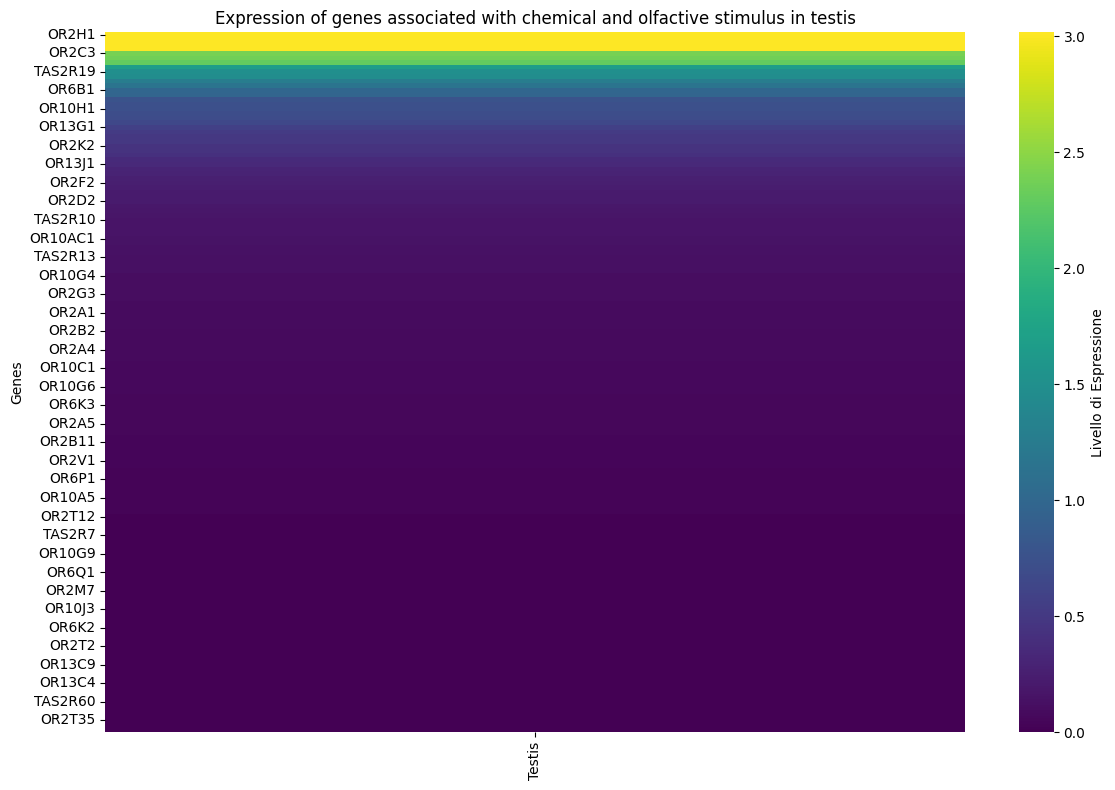

In [7]:
# Loading of filtered data
filtered_data_file = "filtered_expression_testis.tsv"
filtered_rna_seq = pd.read_csv(filtered_data_file, sep="\t")

# Ordering of our genes by their level of expression
expression_columns = [col for col in filtered_rna_seq.columns if col not in ['Name', 'Gene', 'seg']]
filtered_rna_seq['Total_Expression'] = filtered_rna_seq[expression_columns].sum(axis=1)
filtered_rna_seq_sorted = filtered_rna_seq.sort_values(by='Total_Expression', ascending=False)

# creation of the matrix for the heatmap
heatmap_data = filtered_rna_seq_sorted.set_index('Gene')[expression_columns]

# Creation of the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="viridis", cbar_kws={'label': 'Livello di Espressione'}, robust=True)

plt.title("Expression of genes associated with chemical and olfactive stimulus in testis")
plt.ylabel("Genes")
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig("expression_heatmap_testis.png")
plt.show()
